In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot', 'assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# Bayesian Estimates

## 1. Bayes theorem:

$$p(A|B) = \frac{p(A\cap B)}{p(B)} \\
  p(B|A) = \frac{p(B\cap A)}{p(A)}$$
  
but $p(A\cap B) = p(B\cap A)$ so we can write:

$$ p(A|B) = \frac{p(B|A) p(A)}{p(B)} $$

In Bayesian speak, these terms are:

- $p(A|B)$: the posterior probability of $A$ given $B$. This our ultimate goal, to obtain this probability function
- $p(A)$: the prior probability of $A$, before we looked at the data
- $p(B|A)$: the likelihood of $B$ given $A$
- $p(B)$: the probability of $B$ independent of $A$, or for all $A$. In general it's just a normalization hard to compute

In most useful applications for us:

- $A$ is a parameter (or parameter set) from a chosen distribution or a statistic
- $B$ de data observed

## 2. In Concrete.

Let's make it more concrete by looking at something we have already been calculating. Let's say we know that the outcomes from our experiment can be understood as RVs drawn from a gaussian with unkown $\mu$ and $\sigma$. Now we make the experiment a number of times and obtain a sample from the distribution of size $N$. This sample will be our data. What we will be calculating then is:

$$ p(\mu, \sigma| \{x_i\}_{i=1,...,N}) = \frac{p(\{x_i\}_{i=1,...,N}|\mu, \sigma) p(\mu, \sigma)}{p(\{x_i\}_{i=1,...,N})} $$

Notice that $p(\mu, \sigma| \{x_i\}_{i=1,...,N})$: the probability density associated to the probability that the parameters of the parent gaussian are a given value of $\mu$ and $\sigma$, given that we know a sample from said parent gaussian contains the $N$ values $\{x_i\}_{i=1,...,N}$; **IS A FUNCTION**. In this case it is a bivariate function that we need to know for all values of $(\mu, \sigma)$.

Several problems arise when trying to evaluate the right hand side of the expression:

- $p(\{x_i\}_{i=1,...,N}|\mu, \sigma)$: is the probability that we have of obtaining a given sample $\{x_i\}_{i=1,...,N}$ if we knew that the parent gaussian distribution has the known parameters $\mu$ and $\sigma$. This is called the likelihood and it is imperative that we know how to calculate it or get a very good approximation. If our model is a gaussian, then it is fairly simple.

- $p(\mu, \sigma)$ is the probability that the parameters of the parent gaussian take the given values $\mu$ and $\sigma$. Notice that this is a probability independent of any data set. It should be set before knowing anything about our samples. This part is controversial and can cause problems that we will explore later.

- $p(\{x_i\}_{i=1,...,N})$: finally, this is the probability of getting the given data set for any arbitrary gaussian (any arbitrary set of parameters). This one is very hard to compute but we will see that we do not need to compute it to get samples that follow the right distribution. Once we can draw samples that follow a distribution, we can compute statistics on them.

In our case, the likelihood is not hard to compute. If we know that the parent distribution for each data point in the sample is the same and that $x_i \sim \mathcal{N}(\mu, \sigma)$ for all $i$, then the likelihood of getting a given value is:

$$ p(x_i|\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right)$$

If we also know that the samples were obtained independently, then we can use the definition of independence to write that:

$$ p(x_1, x_2, ..., x_N|\mu, \sigma) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right)$$

### 2.1. 1D Example

This is not a very realistic example but it helps for educational purposes. Let's restrict our discussion above a bit further. Let's say that we know our outcomes are RVs drawn from a gaussian with unknown $\mu$ but **known $\sigma$**. So, what we want is to calculate the posterior: 

$$ p(\mu|\{x_i\}_{i=1,...,N}|\sigma) = \frac{p(\{x_i\}_{i=1,...,N}|\mu|\sigma) p(\mu| \sigma)}{p(\{x_i\}_{i=1,...,N}|\sigma)} $$

The expression for the likelihood doesn't change.

We can treat the denominator as a normalizing constant but we need to define a prior:

$$ p(\mu|\{x_i\}_{i=1,...,N}) \propto p(\{x_i\}_{i=1,...,N}|\mu) p(\mu) $$

And we dropped $\sigma$ from the expression to avoid repetition but it should be understood that $\sigma$ is now a fixed value in the problem.

### 2.1.1. Analytic Expression

If we know nothing about the problem (e.g., if we have never made this experiment before), then we cannot constrain $\mu$ a priori. Problem is, we cannot represent $p(\mu)$ with a uniform distribution from $-\infty$ to $\infty$ because that cannot be normalized. But we can cheat and just assign a constant value to the prior, to represent equal belief in any value. If we then try to maximize the posterior, we can do it and the constant chosen vanishes. The trick is to maximize the $\log$ of the posterior. For the maximum a posteriori (MAP), we get the standard expression:

$$ \mu_{\rm MAP} = \frac{1}{N} \sum_{i=1}^{N} x_i $$

Two important points are that:

- In this case the $\mu_{\rm MAP}$ coincides with previous expressions derived from maximum likelihood or other methods but this is not generally the case as it should depend on the prior chosen. In any case, $\mu_{\rm MAP}$ is interesting but it is not the objective of Bayesian anaylsis, remember that we are after **a function $p(\mu|\{x_i\}_{i=1,...,N})$**.
- This is a case where an analytic expression for the posterior can be written. We can even chose a prior that is also gaussian and the full analytic expression is simple. This is something that sometimes is desirable but it is not general. For the general case we will need numerical methods and they have been developed extensively and are continouously been refined as this is an active are of mathematical research.

### 2.1.2. More General Methodology

So, what we are after is a function. The function takes $\mu$ as its argument and it's supposed to be a PDF so it should integrate to 1 over its full domain.

In general, it can be hard to derive said function. However, it is not impossible to take random samples from said PDF if we are able to evaluate a function that is proportional to the PDF (i.e., we do not need to normalize it). If we can create a large sample, we can create its normalized histogram and get a pretty good approximation of the PDF. **That's what MCMC methods are all about. Sampling unnormalized distributions**.

Below we will explor the [`emcee`](https://emcee.readthedocs.io/en/v2.2.1/) package which is a popular option in Astronomy. It uses a type of MCMC sampler called Affine Invariant. We will start with a trivial example of taking samples from a known gaussian distribution.

In [2]:
import emcee
print(emcee.__version__)

2.2.1


In [3]:
from scipy.stats import norm

mu = 10
sigma = 3

# emcee requires a function that is proportional to the probability that we 
# want to sample. In fact, it requires the log of that probability.
def lnprob(x, mu, sigma):
    return -(x-mu)**2 / (2 * sigma**2)

ndim = 1
nwalkers = 2

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[mu, sigma])

In [4]:
# need to define the starting points of the walkers
p0 = [[-1.],
      [-2.]]
N_steps = 2000

np.random.seed(43)
sampler.run_mcmc(p0, N_steps);

In [5]:
print(sampler.chain.shape)
print(sampler.flatchain.shape)

(2, 2000, 1)
(4000, 1)


Text(0,0.5,'$x$')

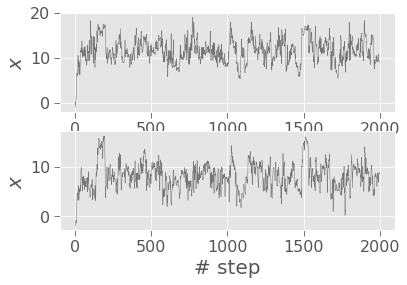

In [6]:
plt.subplot(211)
plt.plot(sampler.chain[0,:], color=gray, lw=0.5)
plt.ylabel('$x$')

plt.subplot(212)
plt.plot(sampler.chain[1,:], color=gray, lw=0.5)
plt.xlabel('# step')
plt.ylabel('$x$')

In [7]:
sampler.acceptance_fraction

array([0.8205, 0.7895])

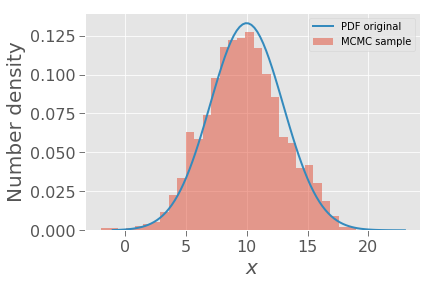

In [8]:
plt.hist(sampler.flatchain, bins=30, density=True, alpha=0.5, 
         label='MCMC sample');

x_to_plot = np.linspace(-1, 23, 100)
plt.plot(x_to_plot, norm.pdf(x_to_plot, loc=mu, scale=sigma), 
         label='PDF original')

plt.xlabel('$x$')
plt.ylabel('Number density')

plt.legend();

It's important to pay attention to the chains, what is their *burn-in* period?, and the acceptance rate.

More walkers with random starting positions is usually better, and they can run in parallel if you have several cores.

In [9]:
ndim = 1
nwalkers = 32

sampler32 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[mu, sigma])

p0 = norm.rvs(loc=0, scale=10, size=(nwalkers, ndim))
N_steps = 3000

sampler32.run_mcmc(p0, N_steps);

In [10]:
print(sampler32.chain.shape)

(32, 3000, 1)


Text(0,0.5,'$x$')

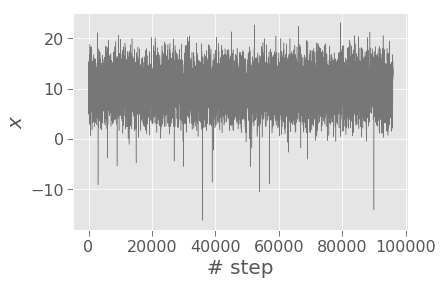

In [11]:
plt.plot(sampler32.flatchain, color=gray, lw=0.5)
plt.xlabel('# step')
plt.ylabel('$x$')

In [12]:
print(sampler32.acceptance_fraction)

[0.803      0.80066667 0.80933333 0.81666667 0.80766667 0.81066667
 0.80766667 0.817      0.79233333 0.81533333 0.80966667 0.80033333
 0.78566667 0.80466667 0.82366667 0.814      0.80133333 0.80133333
 0.812      0.81966667 0.81366667 0.80166667 0.78466667 0.80766667
 0.79866667 0.82733333 0.81233333 0.794      0.81       0.791
 0.79433333 0.80233333]


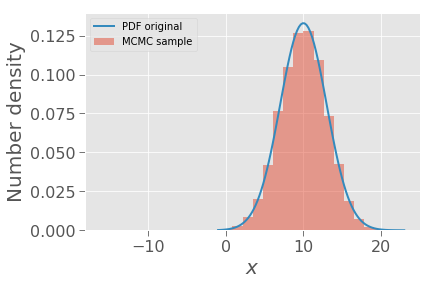

In [13]:
plt.hist(sampler32.flatchain, bins=30, alpha=0.5, density=True,
         label="MCMC sample")
plt.plot(x_to_plot, norm.pdf(x_to_plot, loc=mu, scale=sigma), 
         label='PDF original')

plt.xlabel('$x$')
plt.ylabel('Number density')

plt.legend();

So, how would we use this to solve our problem above? Estimating the distribution of $\mu$ given a known sample from the distribution.

In [14]:
# First our synthetic data
from scipy.stats import norm

mu = 10
sigma = 3
N_sample = 15
sample = norm.rvs(loc=mu, scale=sigma, size=N_sample)
print(sample)

[ 9.58514907 10.56153576  8.84002559 14.97714619  3.85879261 14.19795096
  7.96297864 14.5869554  13.66364789 13.04496555 12.48438995 16.79887812
  8.21513299  8.25619139  8.03231756]


In [15]:
def log_likelihood(mu, x):
    return - np.sum((mu - x)**2 / (2 * sigma**2))

def log_prior(mu):
    if -100.0 < mu < 100:
        return 0.0
    return -np.inf

def lnprob(mu, x):
    lp = log_prior(mu)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(mu, x)

In [16]:
# Now we initialize the walkers
ndim = 1
nwalkers = 16
starting_positions = norm.rvs(loc=11, scale=10, size=(nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[sample])
sampler.run_mcmc(starting_positions, 5000);

Text(0,0.5,'$\\mu$')

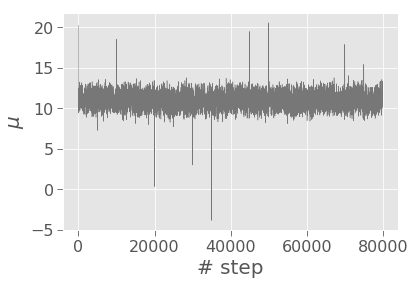

In [17]:
plt.plot(sampler.flatchain, color=gray, lw=0.5)
plt.xlabel('# step')
plt.ylabel('$\mu$')

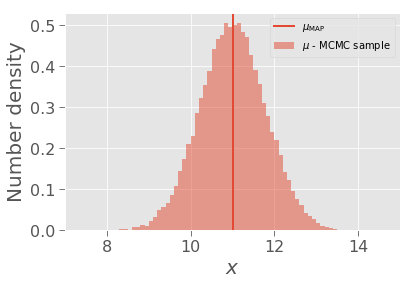

In [18]:
bins = np.arange(0, 30, 0.1)
plt.hist(sampler.flatchain, bins=bins, alpha=0.5, density=True,
         label="$\mu$ - MCMC sample")

plt.axvline(np.mean(sample), label=r'$\mu_{\rm MAP}$')

plt.xlabel('$x$')
plt.ylabel('Number density')

plt.xlim(7, 15)
plt.legend();

### Effect of priors.

Let's make a simple excersise to see what the priors can do.

In [22]:
# Let's say we know mu has to be less than 11.
# The following prior is much more restrictive.
def log_prior2(mu):
    if -100.0 < mu < 11:
        return 0.0
    return -np.inf

def lnprob2(mu, x):
    lp = log_prior2(mu)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(mu, x)

ndim = 1
nwalkers = 16
starting_positions = norm.rvs(loc=11, scale=10, size=(nwalkers, ndim))

sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob2, args=[sample])
sampler2.run_mcmc(starting_positions, 5000);

/opt/tljh/user/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/opt/tljh/user/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


Text(0,0.5,'$\\mu$')

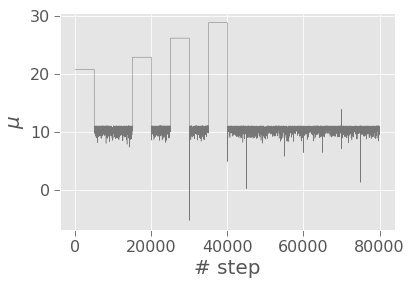

In [23]:
plt.plot(sampler2.flatchain, color=gray, lw=0.5)
plt.xlabel('# step')
plt.ylabel('$\mu$')

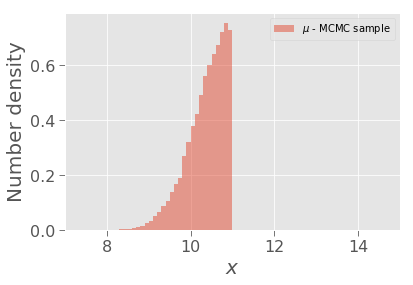

In [25]:
bins = np.arange(0, 30, 0.1)
plt.hist(sampler2.flatchain, bins=bins, alpha=0.5, density=True,
         label="$\mu$ - MCMC sample")

plt.xlabel('$x$')
plt.ylabel('Number density')

plt.xlim(7, 15)
plt.legend();